In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)


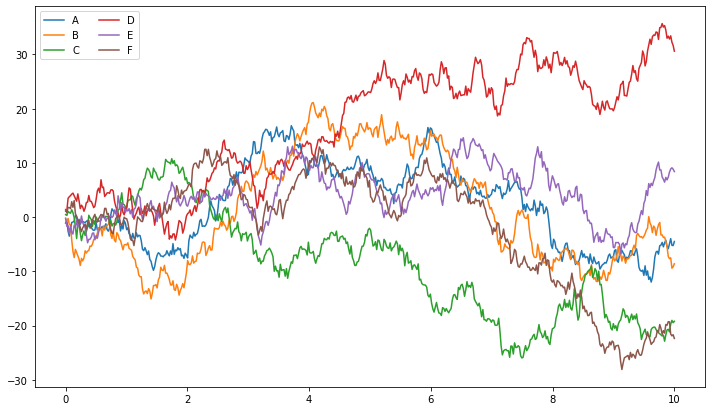

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

### Interagindo com dados


In [4]:
import requests
import pandas as pd


def get_historc_price(symbol, exchange="bitfinex", after="2018-09-01"):
    url = f"https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc"
    resp = requests.get(url, params={
        "periods": "3600",
        "after": str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()

    data = resp.json()
    df = pd.DataFrame(data["result"]["3600"], columns=[
        "CloseTime", "OpenPrince", "HighPrice", "LowPrice", "ClosePrice", "Volume", "NA"
    ])
    df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")
    df.set_index("CloseTime", inplace=True)
    return df

In [5]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-12-19 10:20:41.314258')

In [6]:
btc = get_historc_price("btc", "bitstamp", after=last_week)

In [7]:
eth = get_historc_price("eth", "bitstamp", after=last_week)

In [8]:
# bitcoin
btc.head()

,OpenPrince,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-12-19 11:00:00,16758,16782,16753,16772,24.840841,4.165849e+05
2022-12-19 12:00:00,16772,16773,16730,16734,21.631498,3.624163e+05
2022-12-19 13:00:00,16735,16756,16723,16748,43.565640,7.290417e+05
2022-12-19 14:00:00,16747,16753,16718,16718,50.236390,8.403059e+05
2022-12-19 15:00:00,16716,16758,16674,16733,190.173794,3.177629e+06


<AxesSubplot:xlabel='CloseTime'>

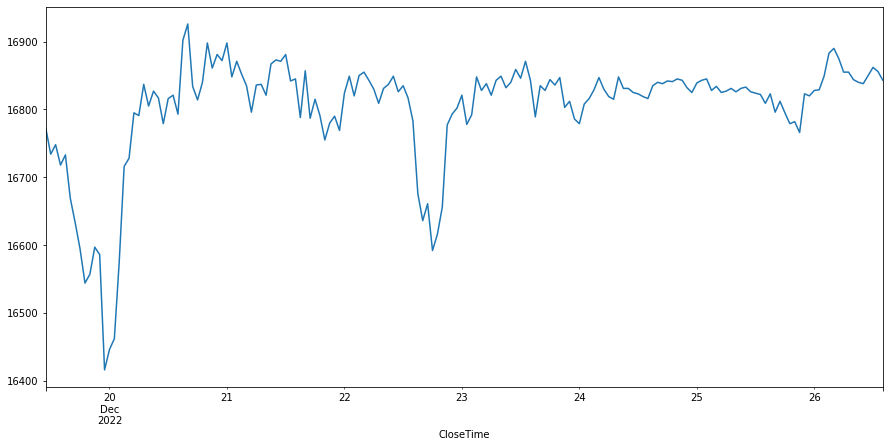

In [9]:
btc["ClosePrice"].plot(figsize=(15, 7))

In [10]:
eth.head()

,OpenPrince,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-12-19 11:00:00,1184.8,1188.2,1183.6,1186.2,390.269564,463100.669251
2022-12-19 12:00:00,1186.3,1186.5,1182.4,1183.4,253.294598,299944.015115
2022-12-19 13:00:00,1183.3,1188.3,1182.6,1186.8,315.255345,373791.685209
2022-12-19 14:00:00,1186.5,1188.2,1182.5,1182.7,165.281266,195876.686306
2022-12-19 15:00:00,1182.6,1189.3,1178.1,1186.3,520.736014,615467.451150


<AxesSubplot:xlabel='CloseTime'>

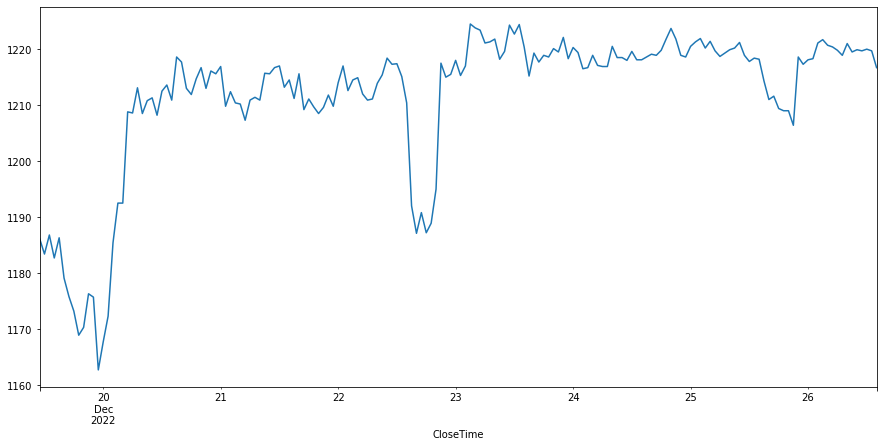

In [11]:
eth["ClosePrice"].plot(figsize=(15, 7))

#### Dynamica plots (Bokeh)

In [12]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [13]:
p1 = figure(x_axis_type="datetime", title="Bitcoin", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc["ClosePrice"], color="#f2a900")

show(p1)

### Parte 4: exportando para Excel

In [14]:
writer = pd.ExcelWriter("cryptos.xlsx")

btc.to_excel(writer, sheet_name="Bitcoin")
eth.to_excel(writer, sheet_name="Ether")

writer.save()